In [1]:
%autosave 20
%matplotlib inline
from matplotlib import rcParams
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
import numpy as np
import pylab as plb
from scipy.optimize import curve_fit
from scipy.interpolate import spline

# Recommended for any plot for a science publication.
# Some paper submision systems (e.g. MNRAS) requires next lines to be done for your pictures.
# Read more about font types: https://en.wikipedia.org/wiki/PostScript_fonts
rcParams['ps.fonttype'] = 42
rcParams['pdf.fonttype'] = 42

rcParams['font.size'] = 14

# Render text with TeX
rcParams['text.usetex'] = True  # You should have working latex in your $PATH

# Font specification example:
# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Times New Roman'

# For Russian
rcParams['text.latex.unicode'] = True
rcParams['text.latex.preamble'] = r'\usepackage[T2A]{fontenc}'  # All other useful packages

Autosaving every 20 seconds


## Практическая работа №1

<br> Дифференциальная задача (1):
$$\mathcal{L}u = f$$
$$u(x_0) = u_0$$
<br> Разностная задача (2):
$$Ly = \Phi$$
$$y_0=u_0$$

**1. В чем состоит сложность сопоставления решения дифференциальной и разностной задач?**
<br> Стремный пример про муху и слона.
<br>**2. Дайте определение сходимости**
    <br> Решение разностной задачи (2) сходится к решению дифференциальной задачи (1), если
    <br> $$||[u]_h-y||_{Y_n}  \rightarrow 0 \text{ при } h \rightarrow 0$$
    <br> Если $$||[u]_h-y||_{Y_n} \leq ch^p \text{,}$$ то говорят, что имеет место сходимость порядка p. 
<br>**3. Что называют невязкой уравнения?**
    <br> Невязкой разностного уравнения называется результат подстановки в него сеточной проекции точного решения дифференциальной задачи
    $$r_n=L[u]_h-\Phi$$
**4. Дайте определение аппроксимации**
    <br> Говорят, что разностная схема (2) аппроксимирует дифференциальную задачу (1), если 
    $$||r_n||\rightarrow 0 \text{ при } h \rightarrow 0$$
    Если $$||r_n||\leq c_1h^k \text{,}$$ то имеет место аппроксимация порядка k. 
<br>**5. Дайте определение устойчивости**
    <br> разностная схема (2) устойчива, если существуют $h_0$ и $\delta > 0$ такие, что
    $$\forall h>h_0 \, \forall \epsilon_1 \text{,} \epsilon_2 < \delta$$
    $$ Ly_1 = \Phi + \epsilon_1$$
    $$ Ly_2 = \Phi + \epsilon_2$$
    $$\rightarrow ||y_1 - y_2|| \leq c_2(||\epsilon_1||+||\epsilon_1||)$$ 
<br> **6. Сформулируйте теорему Лакса-Рябенького-Филиппова**
    <br> Пусть разностная схема (2) аппроксимирует дифференциальную задачу (1) и устойчива. Тогда решение разностной задачи сходится к решению дифференциальной задачи.
<br> **7. Спектральный признак устойчивости**
    <br> Ограничнность степеней собственных значений оператора перехода $|\lambda^m_i|<M$
    <br> Cтрогая устойчивость:
    $$|\lambda_i| \leq 1$$
    <br> Нестрогая устойчивость:
    $$|\lambda_i| < 1+ch$$
<br> **8. Для каких классов задач используют явные/неявные методы Рунге-Кутты**
<br> ЯМРК - нежесткие системы ОДУ, НМРК - жесткие системы ОДУ.
<br> **9. Какой смысл несут необязательные условия Кутты?**
<br> Для получения приближения первого порядка к решению на каждой стадии.
<br> **10. В чем смысл барьеров Бутчера?**
<br> Количество стадий ЯМРК растет быстрее, чем достижимый порядок метода.
<br> Барьеры Бутчера:
<br> Не существует ЯМРК: $s = p$, если $p \geq 5$ 
<br> Не существует ЯМРК: $s = p+1$, если $p \geq 7$ 
<br> Не существует ЯМРК: $s = p+$, если $p \geq 8$ 
<br> **11. Определение А- и L-устойчивости**
<br> Если область абсолютной устойчивости включает в себя левую полуплоскость комплексной плоскости, тто метод называется А-устойчивым.
<br> Если разностная схема А-устойчива и $|R(z)|\mapsto 0$ при $Rez \mapsto - \infty$, то метод называется L-устойчивым.
<br> **12. При каких условиях метод прогонки устойчив?**
<br> Пусть выполнены условия диагонального преобладания 
$$|b_n| \geq |a_n|+|c_n|$$
и хотя бы для одной строки имеет место условие стогого диаонального преобладания
$$|b_n| > |a_n|+|c_n|$$
и $0<|P_1|<1$, тогда алгоритм прогонки устойчив.

### Задача 1
#### X.8.11
Система
$$\begin{cases}
    y' = z\\
    z' = -100y-101z
  \end {cases}$$
является системой первого порядка, эквивалентной уравнению второго
порядка $y″ + 101y + 100y = 0$. Примените метод Эйлера к этой системе с
начальными условиями $y(0) = 2, z(0) = –2$ и определите экспериментально, насколько малым должен быть шаг h, чтобы счет был устойчивым.
Попытайтесь подтвердить выводы о необходимой величине шага h
аналитически. 

#### Решение
$$ \lambda_1 = -100\\ \lambda_2 = -1$$  
<br> $$h = 0.02 $$

No handles with labels found to put in legend.


0.0018432388905499364


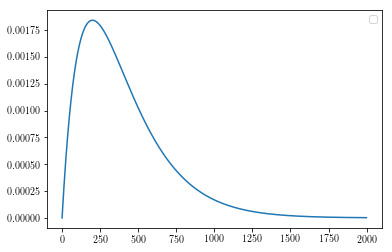

In [108]:
h = 0.005
l = 10
e = 0.01
#Решение
def sol(t):
    return 2*np.exp(-t)

t = np.arange (0, l, 0.02)

N = int(l/h)

th = 0
y = 2
z = -2

#print(N)
y = np.zeros(N+1)
y[0] = 2
z = np.zeros(N+1)
z[0] = -2
th = np.zeros(N+1)
for i in range(N):
    y[i+1] = y[i] + h * z[i] 
    z[i+1] = z[i] + h * (-100*y[i] - 101*z[i])
    th[i+1] = th[i] + h

#plt.plot(th, sol(th), label = 'Решение')
#plt.plot(th, y+1, '--', label = 'h = 0.020')

r = np.zeros(N)
for i in range(N):
    r[i] = y[i] - sol(h*i)
r = np.abs(r)   
print(r.max())

plt.plot(r)
h = 0.0208
y = np.zeros(N+1)
y[0] = 2
z = np.zeros(N+1)
z[0] = -2
th = np.zeros(N+1)
for i in range(N):
    y[i+1] = y[i] + h * z[i] 
    z[i+1] = z[i] + h * (-100*y[i] - 101*z[i])
    th[i+1] = th[i] + h
#plt.plot(th, y+2, '--', label = 'h = 0.0208')

plt.legend()

0.007419522168650272

0.0036941997964254902

0.0018432388905499364

#### XI.9.1. 
Построить численно общие решения для следующих
дифференциальных уравнений:
$$ y''- (10+x^2)y=xe^{-x}$$ $$0<x<10$$
$$ y(0) = 0$$
$$y(10) = 10$$

### Аппроксимация граничных условий

$$\alpha_1y(0) + \beta_1y'(0) = \gamma_1\\
   \alpha_2y(10) + \beta_2y'(10) = \gamma_2$$

In [2]:
N = 1600
h = 10 /N
y = np.zeros(N+1)
(alpha1, beta1, gamma1) = 0, 0, 0
(alpha2, beta2, gamma2) = 0, 0, 0

0.0
[ 0.00000000e+00 -3.51087336e-04 -7.02069196e-04 ... -5.67079281e-07
 -2.91830564e-07  0.00000000e+00]


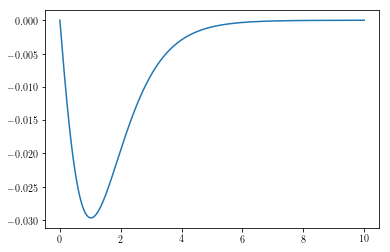

In [3]:
#Разложение в ряд Тейлора
b0 = -(alpha1-beta1/h-beta1*5*h)
c0 = beta1/h
d0 = gamma1
aN = -beta2/h
bN = -(alpha2+beta2/h+55*h)
dN = gamma2 - beta2*5*h*np.exp(-10)


def a(x):
    return 1
def b(x):
    return 2+(10+x**2)*h**2
def c(x):
    return 1
def d(x): 
    return x*np.exp(-x)*h**2

p = np.zeros(N+2)
q = np.zeros(N+2)

p[0] = 682
q[0] = 682

if b0==0:
    p[1] = 0
    q[1] = 0
else:
    p[1] = c0 / b0
    q[1] = -d0 / b0

for i in range(1, N):
    p[i+1] = c(i*h)/(b(i*h)-a(h*i)*p[i])
    q[i+1] = (a(i*h)*q[i]-d(i*h))/(b(i*h)-a(h*i)*p[i])

q[N+1] = (aN*q[N]-dN)/(bN-aN*p[N])
y[N] = q[N+1]
print(q[N+1])

for i in reversed(range(0, N)):
    y[i] = p[i+1]*y[i+1]+q[i+1]
    
x = np.arange(0, 10.+h/2, h)
print(y)
plt.plot(x, y)

#### XI.9.3б
Построить алгоритм метода пристрелки для вычисления
решения следующих нелинейных задач:
$$\begin{cases}
    y'' -x\sqrt y=0 \text{, } 0 \leq x \leq 1 \\
    y(0) = 0\\
    \int_0^1 y(x)dx=1
  \end {cases}$$


Задача Коши: 
$y' = z\\
z' = x \sqrt y \\
y(0) =0\\
z(0)= \alpha$

1.9320449829101562
[0.         0.01932045 0.0386409  0.05796149 0.07728247 0.09660417
 0.11592699 0.13525136 0.15457777 0.17390676 0.19323889 0.21257478
 0.23191506 0.25126042 0.27061155 0.2899692  0.30933413 0.32870714
 0.34808905 0.3674807  0.38688297 0.40629677 0.425723   0.44516262
 0.46461659 0.48408591 0.50357158 0.52307466 0.54259618 0.56213723
 0.5816989  0.60128232 0.62088861 0.64051895 0.6601745  0.67985646
 0.69956605 0.71930449 0.73907305 0.75887299 0.77870559 0.79857217
 0.81847405 0.83841256 0.85838907 0.87840496 0.89846161 0.91856044
 0.93870287 0.95889034 0.97912432 0.99940628 1.01973772 1.04012014
 1.06055508 1.08104406 1.10158866 1.12219044 1.142851   1.16357194
 1.18435488 1.20520147 1.22611335 1.2470922  1.26813971 1.28925756
 1.31044749 1.33171123 1.35305051 1.37446712 1.39596282 1.41753942
 1.43919872 1.46094255 1.48277277 1.50469121 1.52669977 1.54880032
 1.57099478 1.59328507 1.61567312 1.63816089 1.66075035 1.68344348
 1.70624228 1.72914877 1.75216499 1.7752929

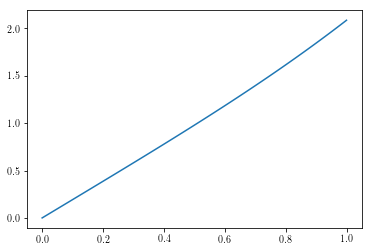

In [86]:
h = 0.01
N = int(1 / h)
y = np.zeros(N+1)
z = np.zeros(N+1)
x = np.zeros(N+1)
    
# Метод Эйлера
def E(a, x, y, z):
    y[0] = 0
    z[0] = a
    x[0] = 0
    for i in range(N):
        y[i+1] = y[i] + h * z[i] 
        z[i+1] = z[i] + h * (x[i] * np.sqrt(y[i]))
        x[i+1] = x[i] + h
    return y

# Формула трапеций
def I(y):
    S = 0.
    for i in range(N):
        S = S + h*(y[i]+y[i+1])/2
    return(S)

# Метод дихотомии

i = 1
j = 3
while(True):
    if((I(E(i,x,y,z))-1)*(I(E((i+j)/2,x,y,z))-1)<0):
        j = (i + j) / 2
    else:
        i = (i + j) / 2
    #print(i)
    if abs(I(E(i,x,y,z))-1) < 0.000001:
        break
print(i)
#i = 0.001
#print(I(E(i,x,y,z)))
y = E(i, x, y, z)
plt.plot(x,y)

print(y)